In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [43]:
df=pd.read_csv('WORLD UNEMPLOYMENT DATA.csv')
df.head(5)

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [44]:
df.shape

(219, 7)

In [45]:
df.columns

Index(['Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014'], dtype='object')

In [46]:
non_country_list=['Arab World','Central Europe and the Baltics','Caribbean small states','East Asia & Pacific (excluding high income)',
                 'Early-demographic dividend', 'East Asia & Pacific','Europe & Central Asia (excluding high income)',
                 'Europe & Central Asia','Euro area','European Union','Fragile and conflict affected situations','High income',
                 'Heavily indebted poor countries (HIPC)','IBRD only', 'IDA & IBRD total', 'IDA total','IDA blend','IDA only',
                 'Latin America & Caribbean (excluding high income)','Latin America & Caribbean','Least developed countries: UN classification', 
                 'Low income','Lower middle income', 'Low & middle income','Late-demographic dividend','Middle East & North Africa',
                 'Middle income','Middle East & North Africa (excluding high income)','North America','OECD members','Other small states',
                 'Pre-demographic dividend','Post-demographic dividend','South Asia','Sub-Saharan Africa (excluding high income)',
                 'Sub-Saharan Africa','Small states','East Asia & Pacific (IDA & IBRD countries)',
                 'Europe & Central Asia (IDA & IBRD countries)','Latin America & the Caribbean (IDA & IBRD countries)',
                 'Middle East & North Africa (IDA & IBRD countries)','South Asia (IDA & IBRD)',
                 'Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income','World']

In [47]:
df_non_country=df[df['Country Name'].isin(non_country_list)]

In [48]:
df_non_country.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
29,Central Europe and the Baltics,CEB,24.558510,25.480771,26.322471,26.775459,24.326735
40,Caribbean small states,CSS,25.004050,23.858827,25.977574,26.477460,24.596775
48,East Asia & Pacific (excluding high income),EAP,11.001822,10.687960,10.891421,11.511484,11.790579
49,Early-demographic dividend,EAR,14.250746,14.180419,14.328332,14.223181,14.350504


In [49]:
df_non_country.shape

(45, 7)

In [50]:
index=df_non_country.index

In [51]:
df_country=df.drop(index)

In [52]:
df_country.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000
5,Argentina,ARG,19.500000,18.799999,18.400000,19.700001,21.299999


In [53]:
df_country.shape

(174, 7)

In [56]:
x_data = ['2010', '2011', '2012', '2013', '2014']

y0 = df_country['2010']
y1 = df_country['2011']
y2 = df_country['2012']
y3 = df_country['2013']
y4 = df_country['2014']

y_data = [y0, y1, y2, y3, y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)']

traces = []

for xd, yd, color in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            whiskerwidth=0.2,
            fillcolor=color,
            marker=dict(
                size=2,
            ),
            boxmean=True,    
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Unemployment Data',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Unemployment Rate (%)',
        autorange=True,
        showgrid=True,
        zeroline=False,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)


In [57]:
l=[]
trace0= go.Scatter(
        y= df_country['2010'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2010'].values,
                    line= dict(width=1),
                    color= df_country['2010'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l.append(trace0);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2010',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False,
)
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)


In [58]:
l1=[]
trace1= go.Scatter(
        y= df_country['2011'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2011'].values,
                    line= dict(width=1),
                    color= df_country['2011'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l1.append(trace1);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2011',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l1, layout=layout)
py.iplot(fig)


In [59]:
l2=[]
trace2= go.Scatter(
        y= df_country['2012'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2012'].values,
                    line= dict(width=1),
                    color= df_country['2012'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l2.append(trace2);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2012',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l2, layout=layout)
py.iplot(fig)

In [60]:
l3=[]
trace3= go.Scatter(
        y= df_country['2013'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2013'].values,
                    line= dict(width=1),
                    color= df_country['2013'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l3.append(trace3);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2013',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l3, layout=layout)
py.iplot(fig)


In [61]:
l4=[]
trace4= go.Scatter(
        y= df_country['2014'],
        mode= 'markers',
        name='Unemployment (%)',
        marker= dict(size= df_country['2014'].values,
                    line= dict(width=1),
                    color= df_country['2014'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= df_country['Country Name'].values) # The hover text goes here... 
l4.append(trace4);

layout= go.Layout(
    title= 'Scatter plot of unemployment rates in 2014',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data=l4, layout=layout)
py.iplot(fig)

In [62]:
df_country['2014-2012 change']=df_country['2014']-df_country['2012']

In [63]:
df_country['2012-2010 change']=df_country['2012']-df_country['2010']

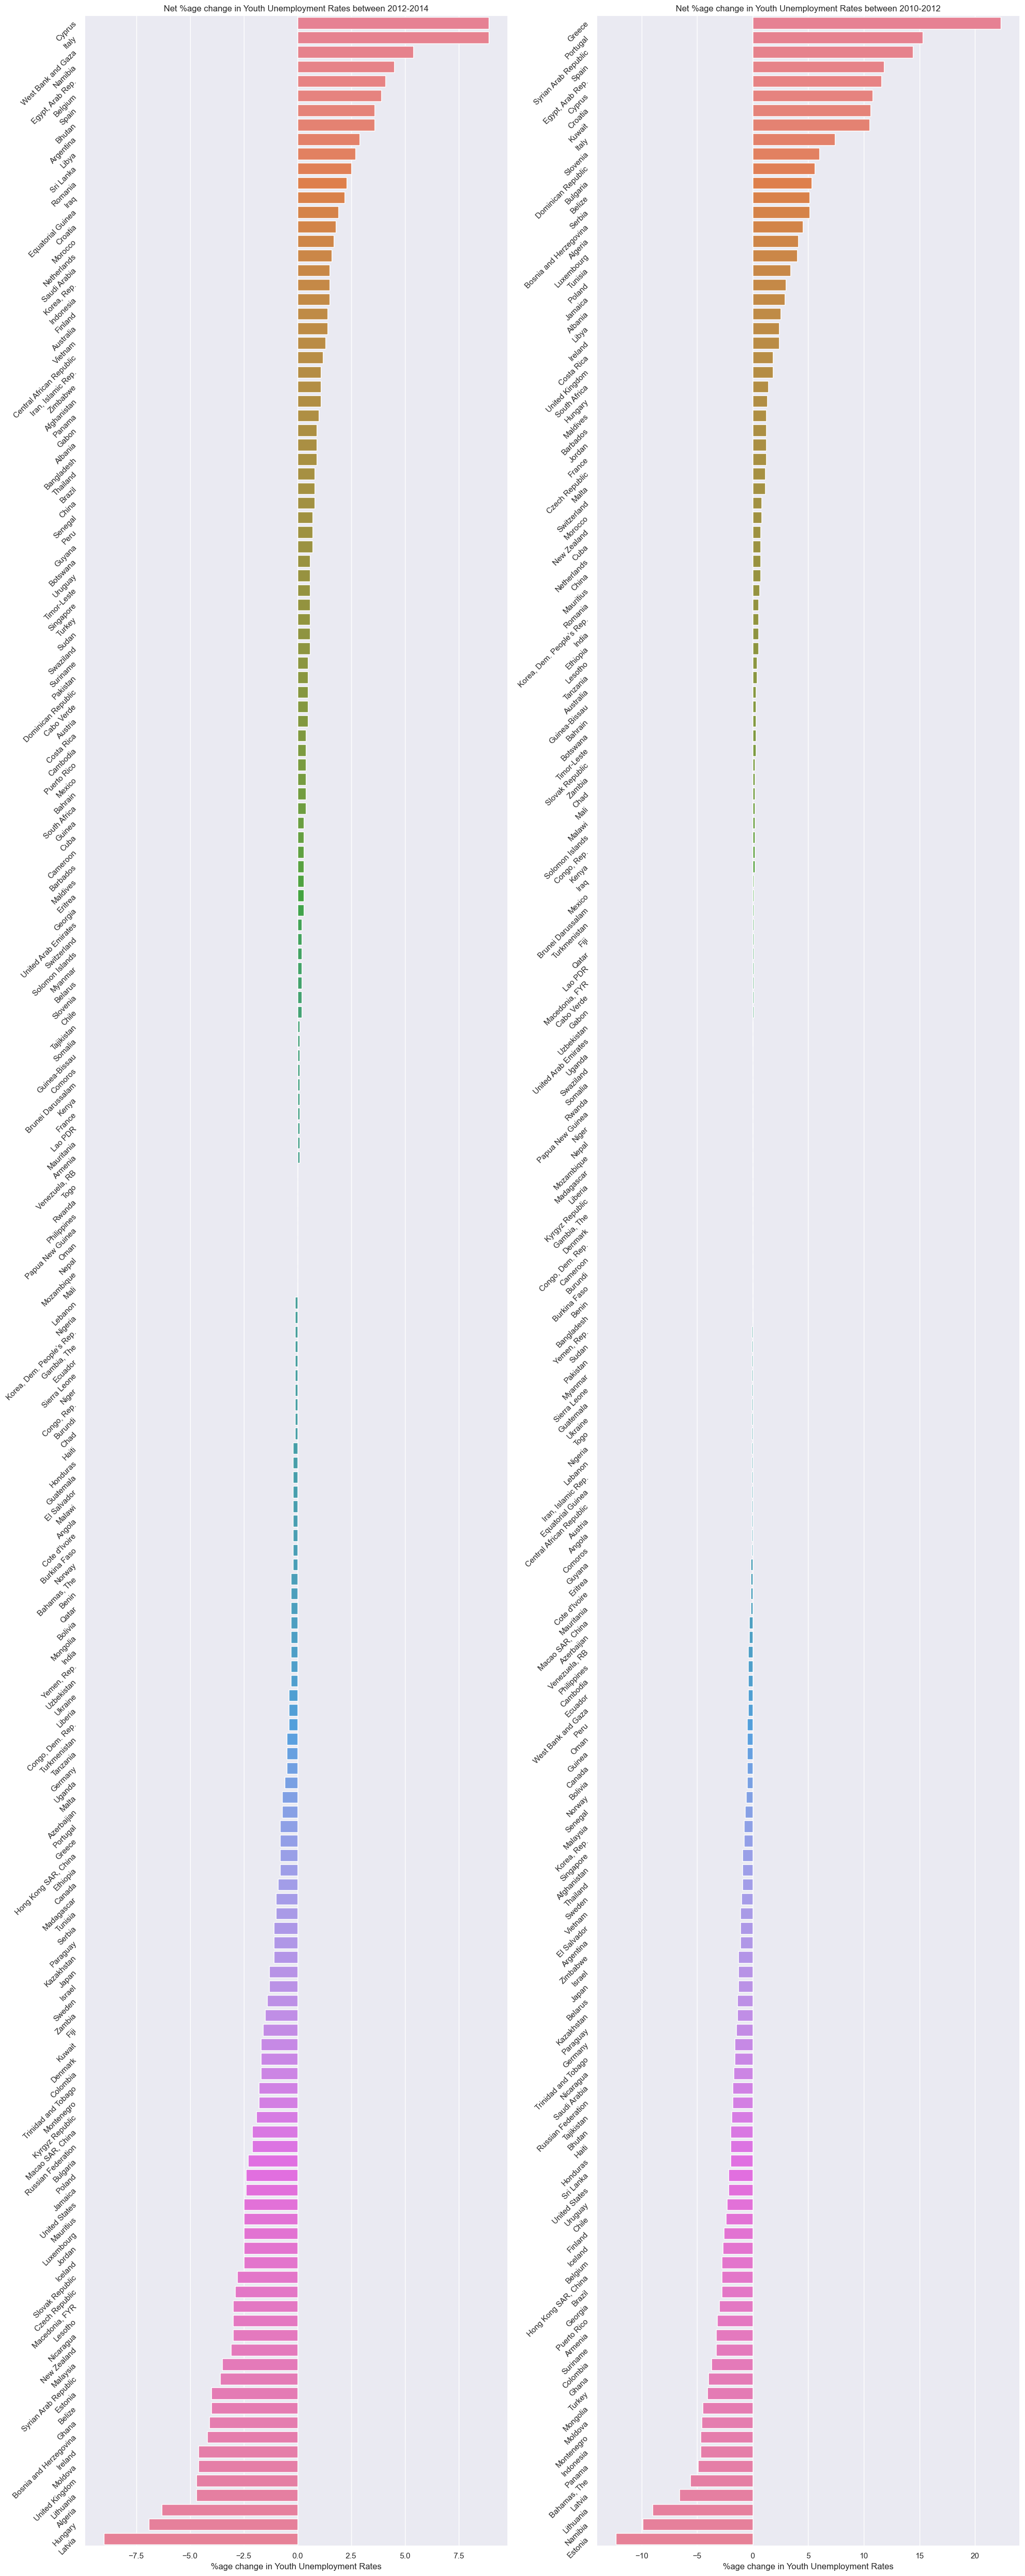

In [69]:
twoyearchange201412_bar, countries_bar1 = (list(x) for x in zip(*sorted(zip(df_country['2014-2012 change'], df_country['Country Name']), reverse=True)))
twoyearchange201210_bar, countries_bar2 = (list(x) for x in zip(*sorted(zip(df_country['2012-2010 change'], df_country['Country Name']), reverse=True)))

sns.set(font_scale=1) 
fig, axes = plt.subplots(1, 2, figsize=(20, 50))
colorspal = sns.color_palette('husl', len(df_country['2014']))

# Plotting the bar plots
sns.barplot(x=twoyearchange201412_bar, y=countries_bar1, palette=colorspal, ax=axes[0])
sns.barplot(x=twoyearchange201210_bar, y=countries_bar2, palette=colorspal, ax=axes[1])

# Setting titles and labels for axes
axes[0].set(xlabel='%age change in Youth Unemployment Rates', title='Net %age change in Youth Unemployment Rates between 2012-2014')
axes[1].set(xlabel='%age change in Youth Unemployment Rates', title='Net %age change in Youth Unemployment Rates between 2010-2012')

# Rotating the y-axis labels for better readability
plt.setp(axes[0].get_yticklabels(), rotation=45)
plt.setp(axes[1].get_yticklabels(), rotation=45)

# Adjusting layout to avoid overlapping of labels
plt.tight_layout()

# Displaying the plots
plt.show()


In [70]:
df_country['2014-2010 change']=df_country['2014']-df_country['2010']

In [76]:
def top_successful_1(df, n=10, column='2014-2010 change'):
    return df.sort_values(by=column, ascending=True).head(n)

In [77]:
def top_failure_1(df, n=10, column='2014-2010 change'):
    return df.sort_values(by=column, ascending=False).head(n)

In [78]:
top15 = top_successful_1(df_country, n=15)

In [79]:
bottom15=top_failure_1(df_country,n=15)

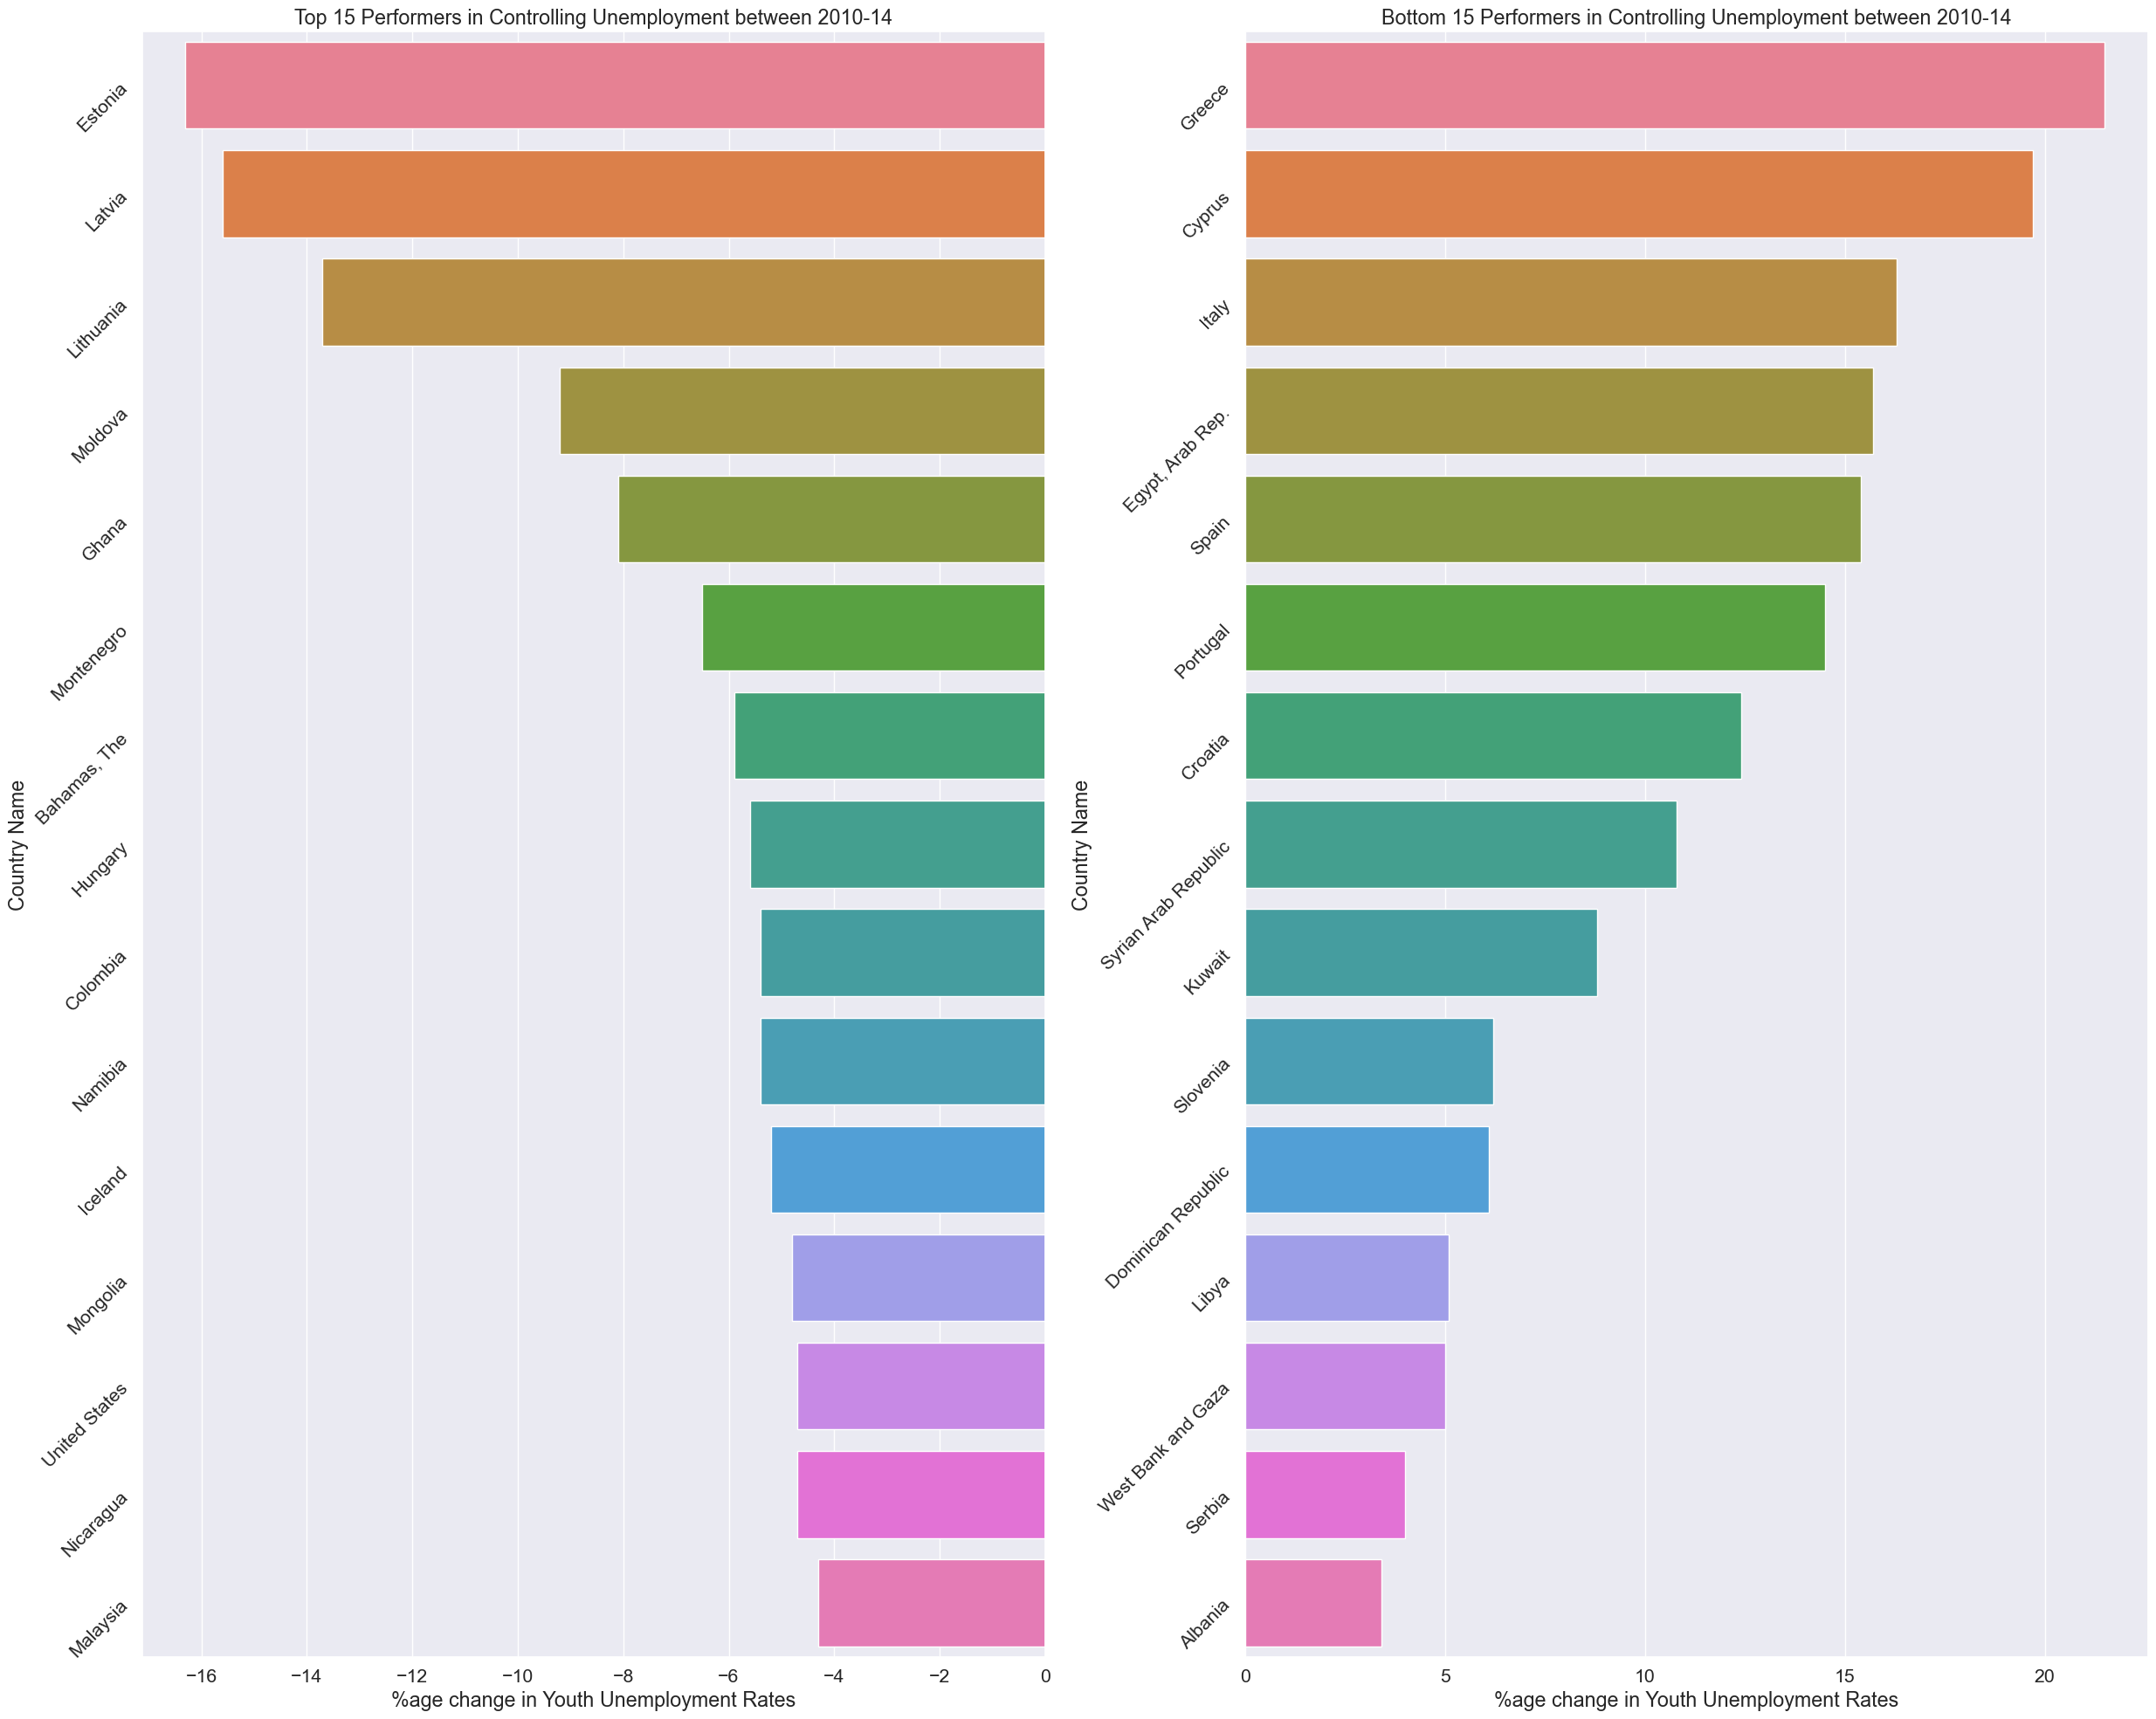

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.4) 
fig, axes = plt.subplots(1, 2, figsize=(25, 20))
colorspal = sns.color_palette('husl', len(top15['2014-2010 change']))

# Plotting the top 15 performers
sns.barplot(x=top15['2014-2010 change'], y=top15['Country Name'], palette=colorspal, ax=axes[0])
# Plotting the bottom 15 performers
sns.barplot(x=bottom15['2014-2010 change'], y=bottom15['Country Name'], palette=colorspal, ax=axes[1])

# Setting titles and labels for axes
axes[0].set(xlabel='%age change in Youth Unemployment Rates', title='Top 15 Performers in Controlling Unemployment between 2010-14')
axes[1].set(xlabel='%age change in Youth Unemployment Rates', title='Bottom 15 Performers in Controlling Unemployment between 2010-14')

# Rotating the y-axis labels for better readability
plt.setp(axes[0].get_yticklabels(), rotation=45)
plt.setp(axes[1].get_yticklabels(), rotation=45)

# Adjusting layout to avoid overlapping of labels
plt.tight_layout()

# Displaying the plots
plt.show()


In [82]:
data = [ dict(
        type = 'choropleth',
        locations = df_country['Country Code'],
        z = df_country['2010'],
        text = df_country['Country Name'],
        colorscale = 'Reds',
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Unemployment (%)'),
      ) ]

layout = dict(
    title = 'Unemployment around the globe in 2010',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        showocean = True,
        #oceancolor = 'rgb(0,255,255)',
        oceancolor = 'rgb(222,243,246)',
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)


In [83]:
data = [ dict(
        type = 'choropleth',
        locations = df_country['Country Code'],
        z = df_country['2014'],
        text = df_country['Country Name'],
        colorscale = 'Reds',
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Unemployment (%)'),
      ) ]

layout = dict(
    title = 'Unemployment around the globe in 2014',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        showocean = True,
        #oceancolor = 'rgb(0,255,255)',
        oceancolor = 'rgb(222,243,246)',
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)


In [84]:
data = [ dict(
        type = 'choropleth',
        locations = df_country['Country Code'],
        z = df_country['2014-2010 change'],
        text = df_country['Country Name'],
        colorscale = 'RdBu',
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Unemployment (%)'),
      ) ]

layout = dict(
    title = 'Net Change in Unemployment around the globe over the 5 year period (2010-14)',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        showocean = True,
        #oceancolor = 'rgb(0,255,255)',
        oceancolor = 'rgb(222,243,246)',
        projection = dict(
            type = 'Mercator'
         )
    )    
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)



In [85]:
supranational_groups=['Arab World','Caribbean small states','East Asia & Pacific','European Union','Latin America & Caribbean',
                      'Middle East & North Africa','North America','OECD members','Other small states','South Asia',
                      'Sub-Saharan Africa','World']

In [86]:
df_supranational=df_non_country[df_non_country['Country Name'].isin(supranational_groups)]

In [87]:
df_supranational=df_supranational[['Country Name','2010','2011','2012','2013','2014']]
df_supranational.head()

,Country Name,2010,2011,2012,2013,2014
3,Arab World,25.022214,28.117516,29.113212,29.335306,29.704569
40,Caribbean small states,25.004050,23.858827,25.977574,26.477460,24.596775
50,East Asia & Pacific,10.925130,10.586137,10.754695,11.296945,11.570405
60,European Union,22.158531,22.793596,25.032586,25.717269,25.116139
110,Latin America & Caribbean,15.133833,14.433149,13.695386,13.392317,14.030340


In [88]:
df_supranational=df_supranational.set_index('Country Name')

In [89]:
df_supranational=(df_supranational.T).copy()
df_supranational.head()

Country Name,Arab World,Caribbean small states,East Asia & Pacific,European Union,Latin America & Caribbean,Middle East & North Africa,North America,OECD members,Other small states,South Asia,Sub-Saharan Africa,World
2010,25.022214,25.004050,10.925130,22.158531,15.133833,25.923886,18.327923,17.246635,24.259008,9.943293,14.652529,13.784957
2011,28.117516,23.858827,10.586137,22.793596,14.433149,28.712132,17.086946,16.764668,23.537174,9.995087,14.523908,13.714673
2012,29.113212,25.977574,10.754695,25.032586,13.695386,29.650675,16.291651,17.085444,22.874889,10.270674,14.503699,13.874293
2013,29.335306,26.477460,11.296945,25.717269,13.392317,29.933500,15.610488,16.923819,23.211869,10.189717,14.050604,13.903832
2014,29.704569,24.596775,11.570405,25.116139,14.030340,30.403553,13.943100,16.408321,23.321337,10.251149,14.124300,13.987184


In [90]:
income_groups=['High income','Heavily indebted poor countries (HIPC)','Least developed countries: UN classification', 
                 'Low income','Lower middle income', 'Low & middle income','Middle income','Upper middle income','World']

In [91]:
df_income=df_non_country[df_non_country['Country Name'].isin(income_groups)]

In [92]:
df_income=df_income[['Country Name','2010','2011','2012','2013','2014']]


In [93]:
df_income=df_income.set_index('Country Name')

In [94]:
df_income=(df_income.T).copy()
df_income

Country Name,High income,Heavily indebted poor countries (HIPC),Least developed countries: UN classification,Low income,Lower middle income,Low & middle income,Middle income,Upper middle income,World
2010,18.517204,11.676580,11.406600,10.385377,13.061031,13.144880,13.453677,13.918079,13.784957
2011,18.184176,11.631835,11.452909,10.421061,13.128082,13.110829,13.422218,13.779605,13.714673
2012,18.653569,11.488855,11.431832,10.405270,13.231023,13.228547,13.568301,13.992812,13.874293
2013,18.589113,11.057185,11.407369,10.216408,13.320711,13.269025,13.651924,14.086227,13.903832
2014,17.831892,11.124920,11.458322,10.229319,13.384825,13.467008,13.890205,14.581009,13.987184


In [98]:
import plotly.graph_objs as go
import plotly.offline as py

# Assuming you have defined df_supranational correctly

supranational_groups = ['Arab World', 'Caribbean small states', 'East Asia & Pacific', 'European Union',
                        'Latin America & Caribbean', 'Middle East & North Africa', 'North America',
                        'OECD members', 'Other small states', 'South Asia', 'Sub-Saharan Africa', 'World']

years = df_supranational.index

traces = []

# Loop through each supranational group and create a trace for each one
for i in range(len(supranational_groups)):
    traces.append(go.Scatter(
        x=years,
        y=df_supranational.iloc[:, i],
        name=supranational_groups[i],
        mode='lines+markers',
        line=dict(
            width=3,
            dash='dashdot')
    ))

layout = go.Layout(
    title='Unemployment Over the Years in different Regions of the World',
    yaxis=dict(title='Unemployment Rate (%)',
               zeroline=True,
               showline=True,
               showgrid=False,
               showticklabels=True,
               linecolor='rgb(0,0,0)',
               linewidth=2,
               tickmode='auto',
               tickwidth=2,
               ticklen=5,
               nticks=8,
               tickfont=dict(
                   family='Arial',
                   size=12,
                   color='rgb(82, 82, 82)',
               ),
               ticks='outside'),

    xaxis=dict(title='Years',
               showline=True,
               showgrid=False,
               showticklabels=True,
               linecolor='rgb(0,0,0)',
               linewidth=2,
                dtick=2,
               tickwidth=2,
               ticklen=5,
               tickfont=dict(
                   family='Arial',
                   size=12,
                   color='rgb(82, 82, 82)',
               ),
               ticks='outside',
               tickmode='array',
               tickvals=['2009', '2010', '2011', '2012', '2013', '2014', '2015'])
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)


In [106]:
layout = go.Layout(
    title='Unemployment Over the Years among Various Income Groups',
    yaxis=dict(title='Unemployment Rate (%)',
               zeroline=True,
               showline=True,
               showgrid=False,
               showticklabels=True,
               linecolor='rgb(0,0,0)',
               linewidth=2,
               tickmode='auto',
               tickwidth=2,
               ticklen=5,
               nticks=8,
               tickfont=dict(
                   family='Arial',
                   size=12,
                   color='rgb(82, 82, 82)',
                   ),
               ticks='outside'),

    xaxis=dict(title='Years',
               showline=True,
               showgrid=False,
               showticklabels=True,
               linecolor='rgb(0,0,0)',
               linewidth=2,
              dtick = 3,
               tickwidth=2,
               ticklen=5,
               tickfont=dict(
                   family='Arial',
                   size=12,
                   color='rgb(82, 82, 82)',
                   ),
               ticks='outside',
               tickmode='array',
               tickvals=['2009','2010', '2011', '2012', '2013', '2014','2015'])
)
